Methods to apply Regression on Real numbered parameters, using complex coefficients.


To do:  
* Ramdomise parameters used in Random Search Algorithim  
* Create a Complex Manifold mapping Real plane to Complex plane
* Multiple targets vavriables

Promising results with Non-linearly seperable data.
Note:
- Optimise Gradient Descent
- Optimise Activation function (two variables mapping to one, losing information)
- Get circular Data

In [1]:
from linear_regression import \
    ComplexLinearRegression, LinearRegression
import math
import numpy as np
import random
from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Get data

In [2]:
#data = load_boston()
#X = data["data"]
#y = data["target"]

In [3]:
#data = load_diabetes()
#X = data["data"]
#y = data["target"]

In [38]:
X, y = make_regression(
    n_samples = 1000,
    n_features = 6,
    n_informative = 40,
    n_targets = 1,
    bias = 0.1,
    noise=10)

# Make none-linear
y = np.abs(y)

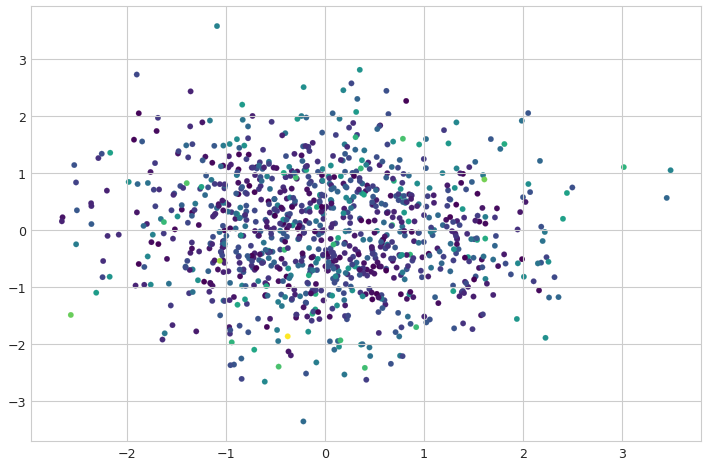

In [39]:
plt.scatter(x = X[:,0], y = X[:,1], c = y)

# Complex Valued Linear Regression

In [40]:
X_ = X# np.array([[j+1j for j in i] for i in X])

In [41]:
clr = ComplexLinearRegression(alpha = 0.1, n_iter=3000)

clr.fit(X_, y)

100%|██████████| 3000/3000 [02:59<00:00, 16.73it/s]


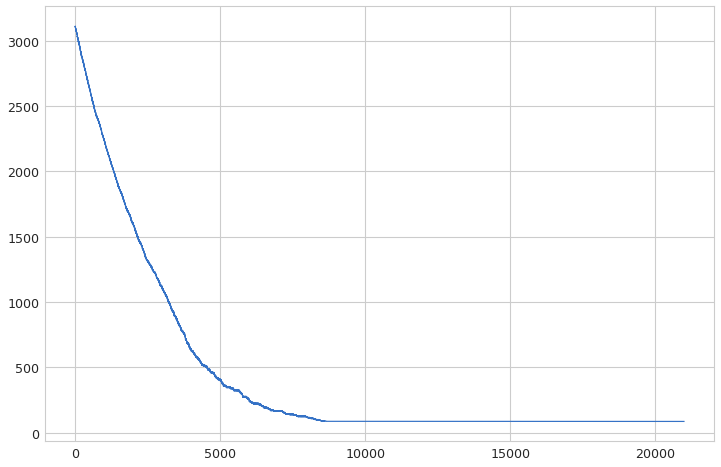

In [42]:
# Plotting loss
plt.plot(clr.loss)

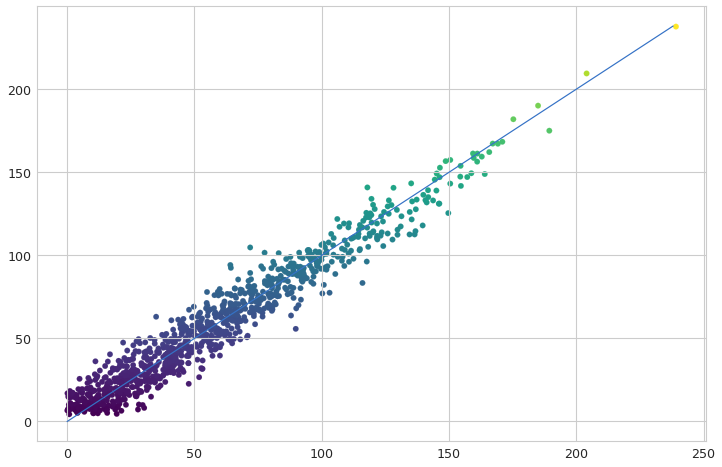

In [43]:
# Comparing predicted and expected results
plt.scatter(x = y, y = clr.predict(X_), c = clr.predict(X_))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

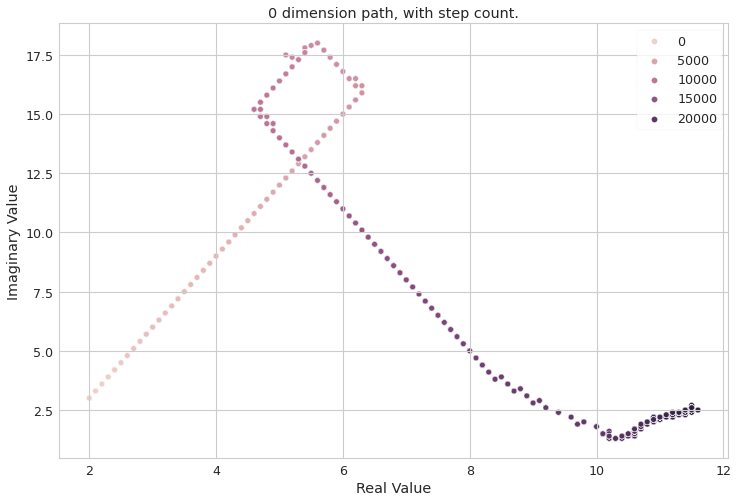

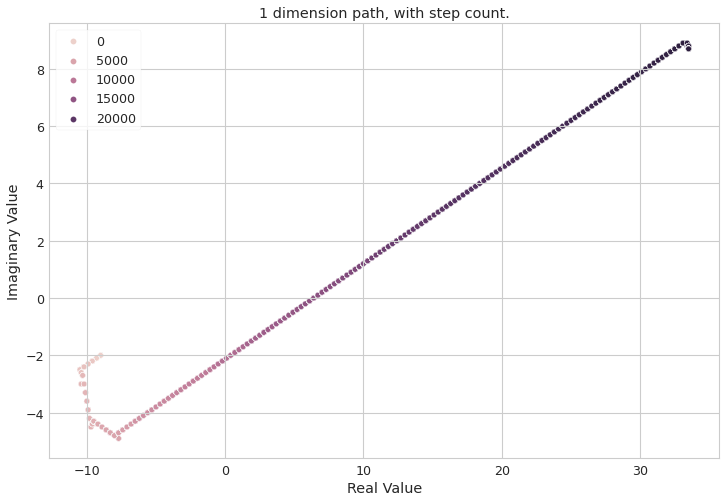

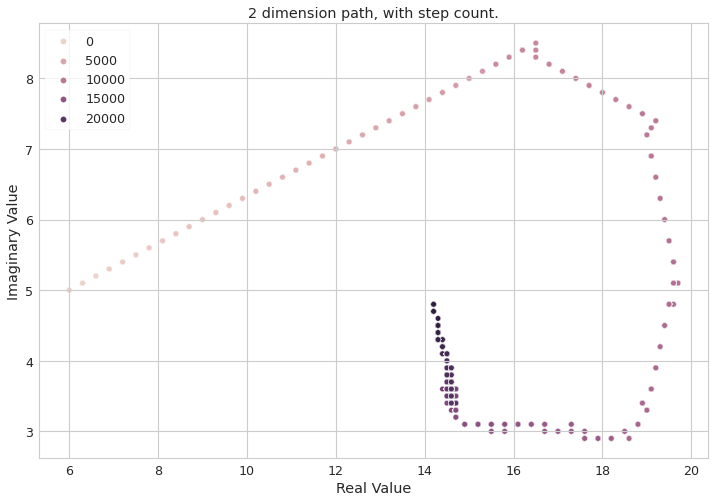

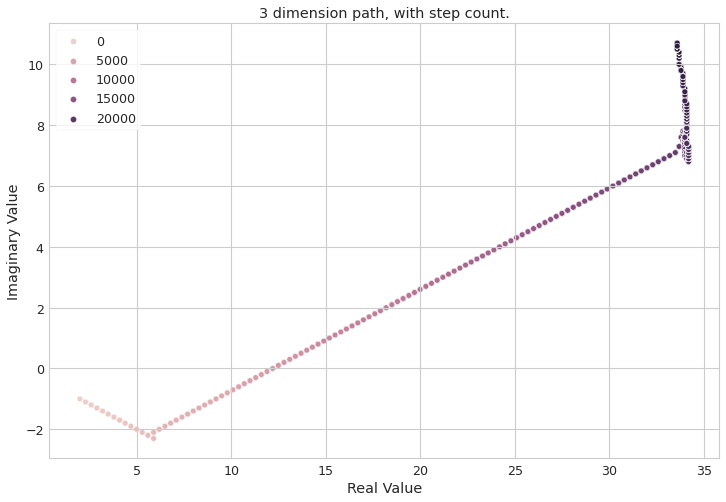

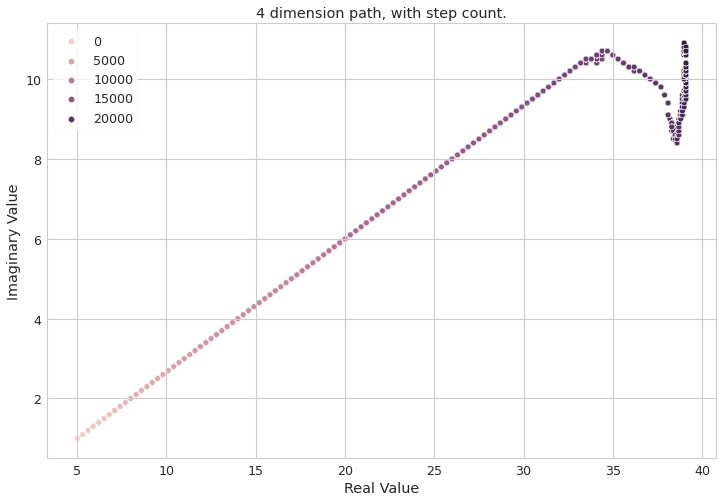

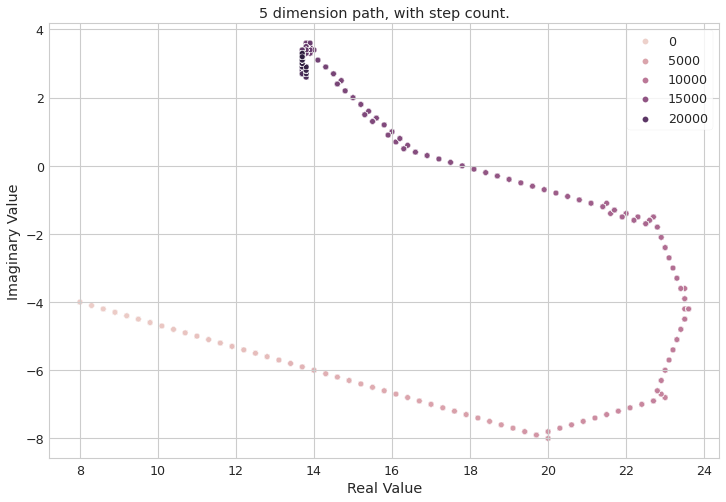

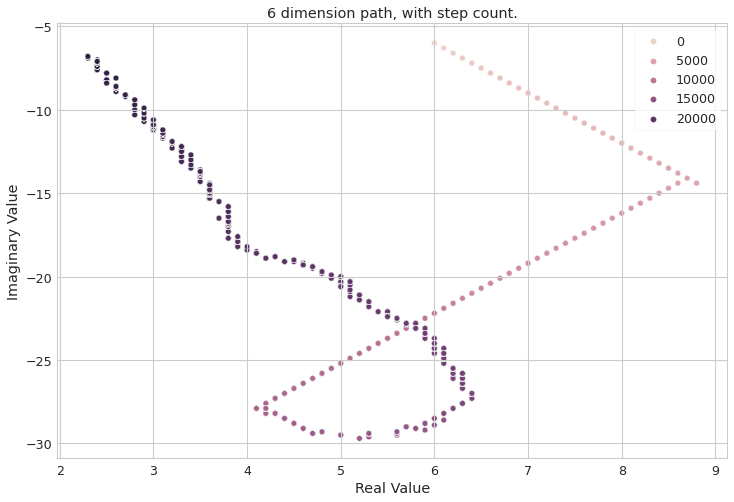

In [44]:
# Plot gradient path of variables
history = clr.weights_history
for j in range(history[0].shape[0]):
    
    fig = sns.scatterplot(x =[i[j].real for i in history], y =[i[j].imag for i in history], hue = range(len(history)))
    plt.xlabel("Real Value")
    plt.ylabel("Imaginary Value")
    plt.title(f"{j} dimension path, with step count.")

    plt.show()

In [45]:
print(f"MSE: {sum((y - clr.predict(X_))**2)/len(y)}")

MSE: 86.48429838612705


# Compare to Real valued Linear Regression

In [46]:
lr = LinearRegression(alpha = 0.1, n_iter=10000)

lr.fit(X, y)

100%|██████████| 10000/10000 [00:32<00:00, 308.59it/s]


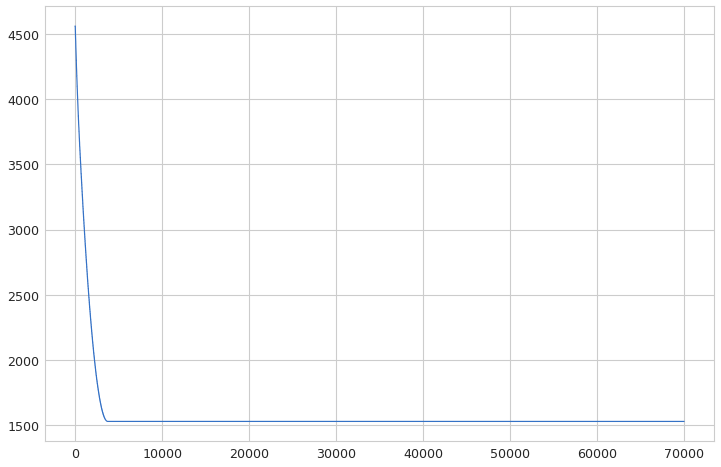

In [47]:
# Plotting loss
plt.plot(lr.loss)

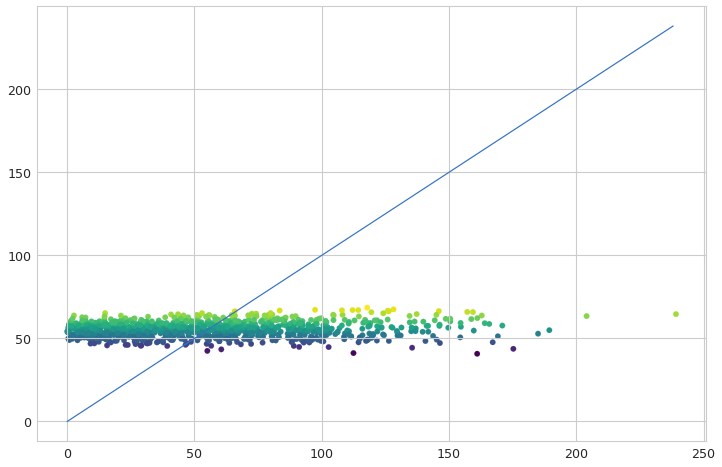

In [48]:
# Comparing predicted and expected results
plt.scatter(x = y, y = lr.predict(X), c = lr.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

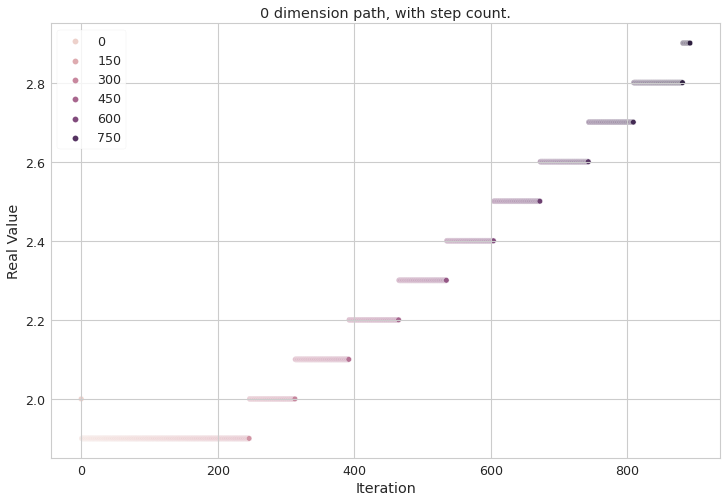

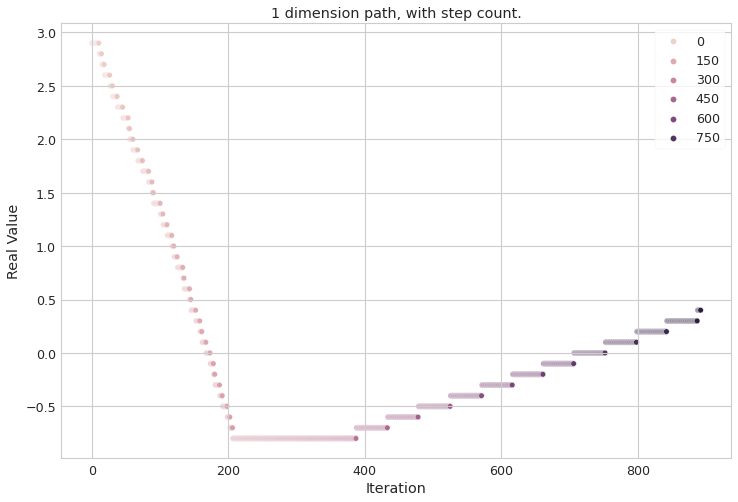

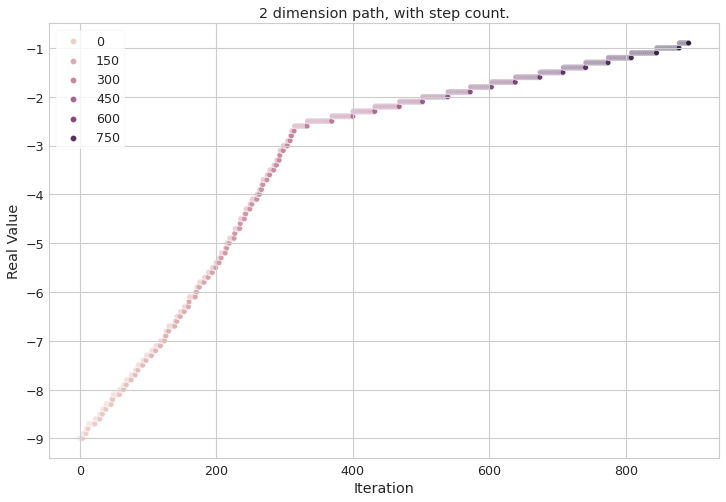

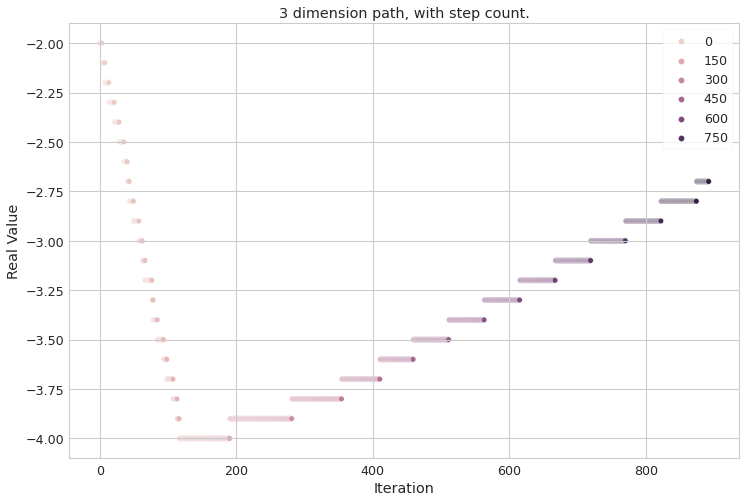

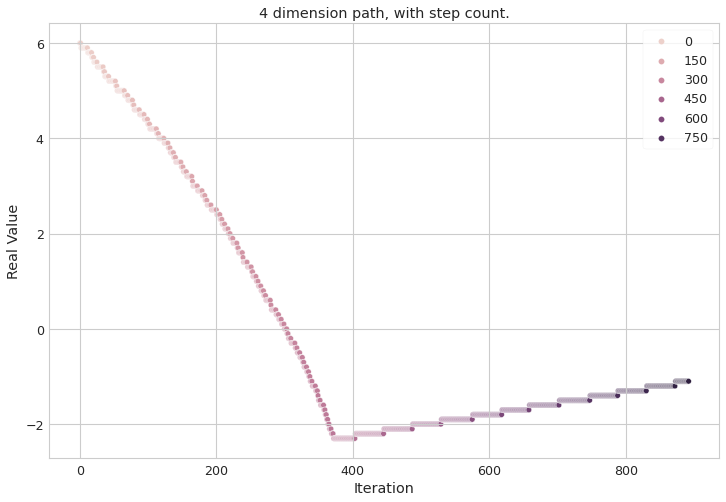

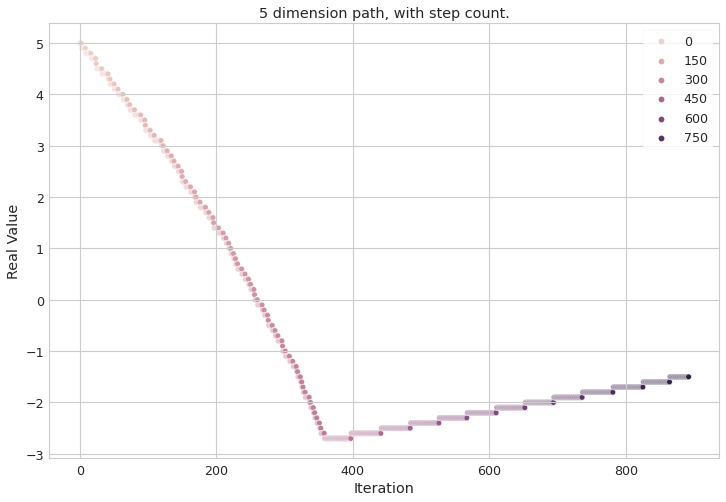

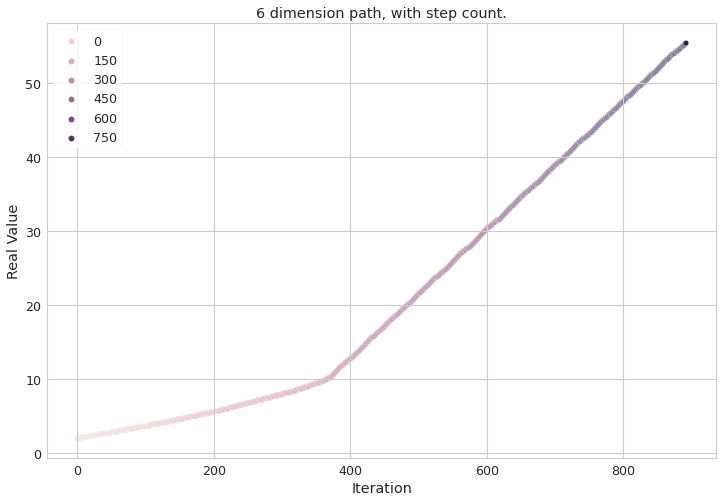

In [49]:
# Plot gradient path of variables
history = lr.weights_history
for j in range(history[0].shape[0]):
    
    fig = sns.scatterplot(x =range(len(history)), y =[i[j] for i in history], hue = range(len(history)))
    plt.xlabel("Iteration")
    plt.ylabel("Real Value")
    plt.title(f"{j} dimension path, with step count.")
    
    plt.show()

In [50]:
print(f"MSE: {sum((y - lr.predict(X))**2)/len(y)}")

MSE: 1527.2980845615673


# Compare to Real valued Sklearn Linear Regression

MSE: 1527.2950615821724


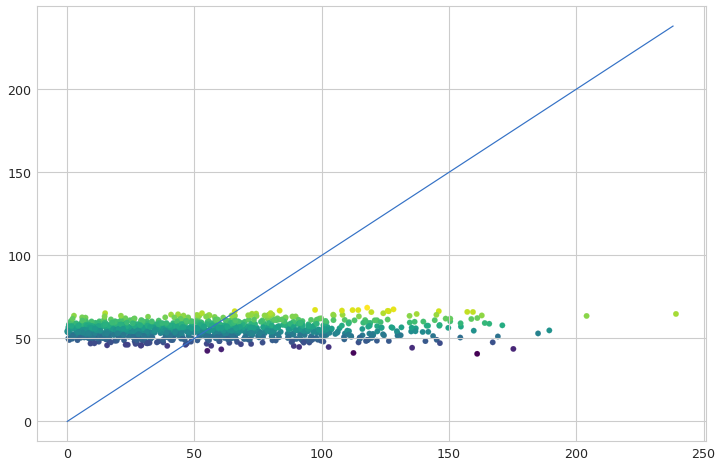

In [51]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
lin_r = SklearnLinearRegression()

lin_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = lin_r.predict(X), c = lin_r.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

print(f"MSE: {sum((y - lin_r.predict(X))**2)/len(y)}")

# Compare to non-linear Regression

### SGDRegressor

MSE: 1527.9164571355568


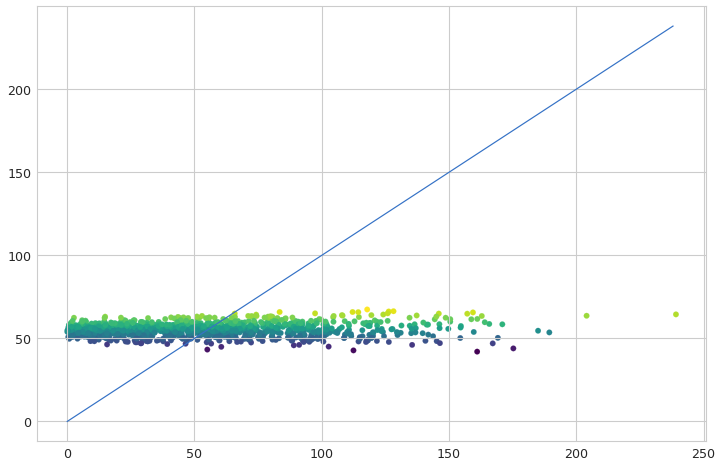

In [52]:
from sklearn.linear_model import SGDRegressor
sgd_r = SGDRegressor()

sgd_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = sgd_r.predict(X), c = sgd_r.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

print(f"MSE: {sum((y - sgd_r.predict(X))**2)/len(y)}")

### MLPRegressor

/home/daire/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE: 275.148450674179


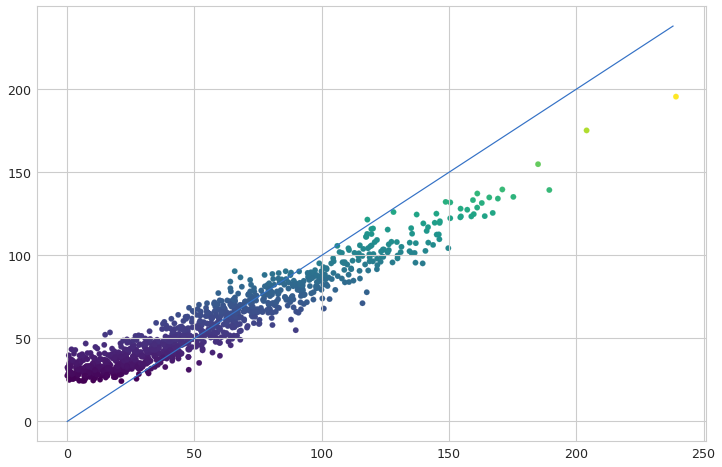

In [53]:
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor()

mlp_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = mlp_r.predict(X), c = mlp_r.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

print(f"MSE: {sum((y - mlp_r.predict(X))**2)/len(y)}")

### SVM

MSE: 991.7864193713841


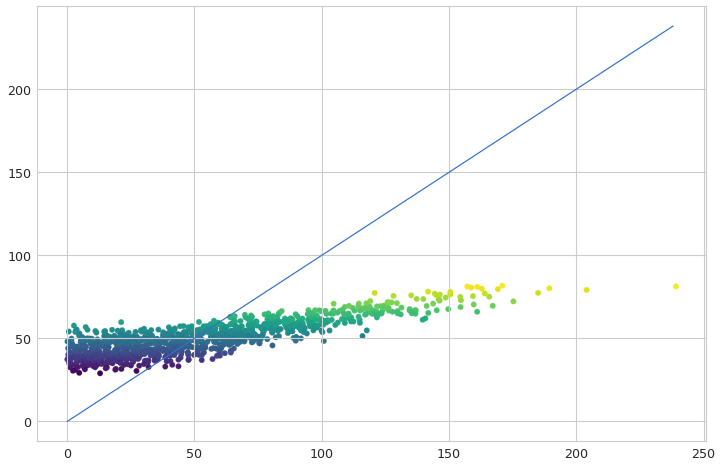

In [54]:
from sklearn.svm import SVR
svm_r = SVR()

svm_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = svm_r.predict(X), c = svm_r.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

print(f"MSE: {sum((y - svm_r.predict(X))**2)/len(y)}")

### RandomForestRegressor

MSE: 68.77769947427596


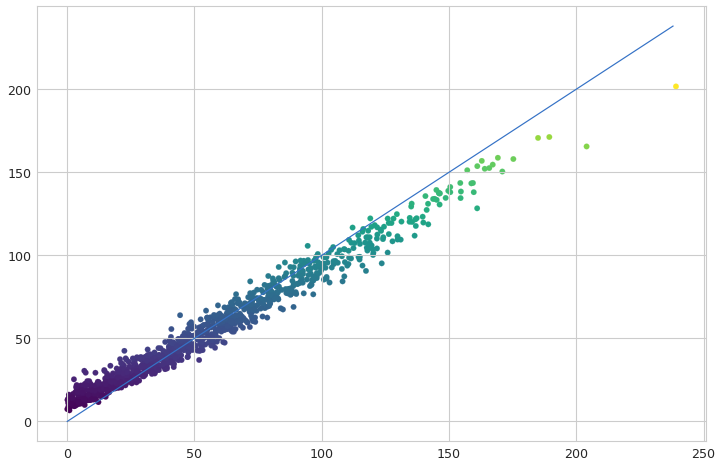

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor()

rf_r.fit(X, y)

# Comparing predicted and expected results
plt.scatter(x = y, y = rf_r.predict(X), c = rf_r.predict(X))
plt.plot(range(int(min(y)),int(max(y))), range(int(min(y)),int(max(y))))

print(f"MSE: {sum((y - rf_r.predict(X))**2)/len(y)}")